### IMDb Scraper

Scrape IMDb for ratings of a series and plot it.

In [71]:
# Import necessary libraries
from bs4 import BeautifulSoup, SoupStrainer
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import json

sns.set_style('whitegrid')

In [57]:
# Get IMDb ID
inp = "game of thrones"
# Turn input into IMDb search url
inp = inp.replace(' ', '+')
search_url = "https://www.imdb.com/find?q={0}&ref_=nv_sr_sm".format(inp)

# Scrape search url for the IMDb ID of first search result
strainer = SoupStrainer('td',{'class':'result_text'})
resp = requests.get(search_url)
soup = BeautifulSoup(resp.text, features="lxml", parse_only=strainer)

print(soup.prettify())

imdbid = soup.find('a',href=True)
imdbid = str(imdbid).split("/")[2]
print(imdbid)

<!DOCTYPE html>
<td class="result_text">
 <a href="/title/tt0944947/">
  Game of Thrones
 </a>
 (2011) (TV Series)
</td>
<td class="result_text">
 <a href="/title/tt13380510/">
  Game of Thrones
 </a>
 (2003) (Video)
</td>
<td class="result_text">
 <a href="/title/tt2231444/">
  Game of Thrones
 </a>
 (2012) (Video Game)
</td>
<td class="result_text">
 <a href="/title/tt10090796/">
  Game of Thrones: The Last Watch
 </a>
 (2019) (TV Movie)
</td>
<td class="result_text">
 <a href="/title/tt3391176/">
  Game of Thrones: A Telltale Games Series
 </a>
 (2014) (Video Game)
</td>
<td class="result_text">
 <a href="/title/tt7937220/">
  Game of Thrones Conquest &amp; Rebellion: An Animated History of the Seven Kingdoms
 </a>
 (2017) (Video)
</td>
<td class="result_text" colspan="2">
 <a href="/search/keyword?keywords=game-of-thrones">
  game-of-thrones
 </a>
 (96 titles)
</td>
<td class="result_text" colspan="2">
 <a href="/search/keyword?keywords=game-of-thrones-actor">
  game-of-thrones-act

Scraping Season 1
Scraping Season 2
Scraping Season 3
Scraping Season 4
Scraping Season 5
Scraping Season 6
Scraping Season 7
Scraping Season 8


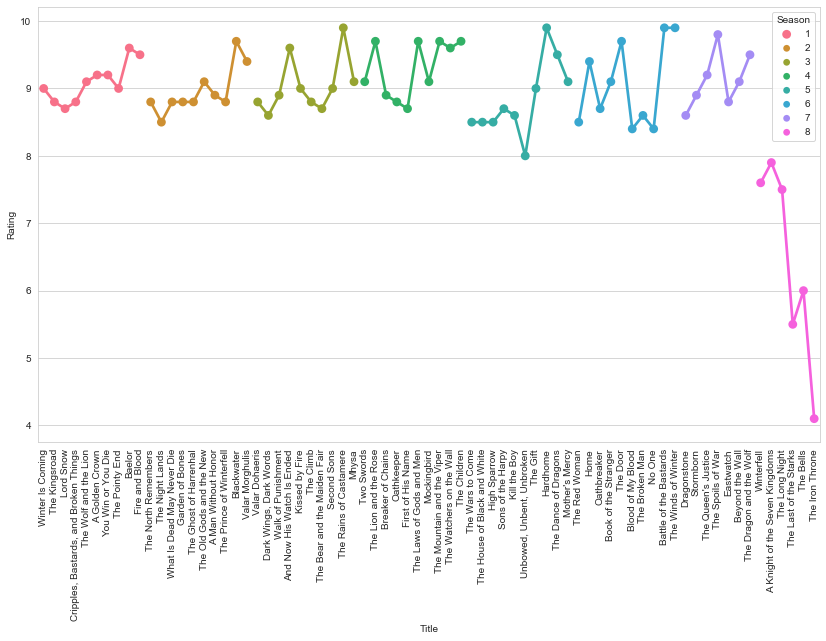

In [44]:
titles = []
ratings = []
s_data = []
s = 0
true_season = 0

while len(ratings)==len(titles) :
    # Go to new season
    s += 1
    
    url = 'https://www.imdb.com/title/{}/episodes?season={}'.format(imdbid, s)
    
    resp = requests.get(url)
    soup = BeautifulSoup(resp.text)
    
    # Get the actual season from soup (to compare with season nmber in loop)
    true_season = soup.find('h3',{'id':'episode_top',  'itemprop':'name'})
    true_season = int(true_season.text[6:])
    if true_season != s:
        break
    
    print("Scraping Season {}".format(s))
    
    # Get titles from soup
    title_list = soup.find_all('a',{'itemprop':'name'})
    # Get ratings from soup
    rating_list = soup.find_all('span',{'class':'ipl-rating-star__rating'})

    # Concatenate all titles 
    for x in title_list:
        titles.append(x.text)
        s_data.append(s)

    # Concatenate all respective ratings
    for x in rating_list:
        #print(x.text)
        if len(x.text)==3:
            ratings.append(float(x.text))
 

# Check if number of ratings and names are the same
if len(ratings)!=len(titles):
    titles = titles[:len(ratings)]
    s_data = s_data[:len(ratings)]

# Put everything into pandas dataframe
d = {'Title':titles,'Season':s_data,'Rating':ratings}
df = pd.DataFrame(d)

# If duplicates in title add season number
dup = df['Title'].duplicated(keep=False)
if not df[dup].empty:
    df['Title'].loc[dup] = df[dup].apply(lambda x: str(x.Title)+' (S'+str(x.Season)+')',axis=1)
    
# Plot
plt.figure(figsize=(14,8))
g = sns.pointplot(x='Title', y='Rating', 
                 hue='Season', data=df,
                 join=True,
                 legend=False,
                 palette=sns.color_palette("husl",df['Season'][df.index[-1]]))
plt.xticks(rotation=90)
plt.show()

In [81]:
season = 0
data = []
while True:
    season += 1
    url = f'https://www.imdb.com/title/tt8772296/episodes?season={season}'

    resp = requests.get(url)
    soup = BeautifulSoup(resp.text)

    # Get the actual season from soup (to compare with season nmber in loop)
    true_season = soup.find('h3',{'id':'episode_top',  'itemprop':'name'})
    true_season = int(true_season.text.split()[1])
    if season != true_season:
        break
    
    print(f"Scraping Season {season}")
    # Get titles from soup
    titles = [t.text for t in soup.find_all('a',{'itemprop':'name'})]
    # Get ratings from soup
    ratings = [r.text for r in soup.find_all('span',{'class':'ipl-rating-star__rating'})][::23]

    data.append({"Season":season, "Episodes":[{"Title":t, "Rating":r} for (t,r) in zip(titles, ratings)]})
    

print(json.dumps(data, indent=4))

Scraping Season 1
Scraping Season 2
[
    {
        "Season": 1,
        "Episodes": [
            {
                "Title": "Pilot",
                "Rating": "8.2"
            },
            {
                "Title": "Stuntin' Like My Daddy",
                "Rating": "8.3"
            },
            {
                "Title": "Made You Look",
                "Rating": "8.6"
            },
            {
                "Title": "Shook Ones Pt II",
                "Rating": "9.2"
            },
            {
                "Title": "'03 Bonnie and Clyde",
                "Rating": "8.3"
            },
            {
                "Title": "The Next Episode",
                "Rating": "8.3"
            },
            {
                "Title": "The Trials and Tribulations of Trying to Pee While Depressed",
                "Rating": "8.7"
            },
            {
                "Title": "And Salt the Earth Behind You",
                "Rating": "8.4"
            }
        ]
   

In [82]:
pd.DataFrame(data)

,Season,Episodes
0,1,"[{'Title': 'Pilot', 'Rating': '8.2'}, {'Title'..."
1,2,[{'Title': 'Trying to Get to Heaven Before The...
